In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bunker-sales-breakdown-monthly.csv')
df.head()

,month,bunker_type,bunker_sales
0,1995-01,Marine Gas Oil,135.4
1,1995-01,Marine Diesel Oil,67.9
2,1995-01,Marine Fuel Oil 180 cst,412.9
3,1995-01,Marine Fuel Oil 380 cst,820.3
4,1995-01,Marine Fuel Oil 500 cst +,0.0


In [3]:
#renaming 'month' column to 'date'
df.columns
df.rename(columns = {'month':'date'}, inplace = True)

df.head()

,date,bunker_type,bunker_sales
0,1995-01,Marine Gas Oil,135.4
1,1995-01,Marine Diesel Oil,67.9
2,1995-01,Marine Fuel Oil 180 cst,412.9
3,1995-01,Marine Fuel Oil 380 cst,820.3
4,1995-01,Marine Fuel Oil 500 cst +,0.0


In [4]:
#creating month column
df['month'] =  df["date"].str[5:7]

#converting values in month from str to int
df['month'] = df['month'].astype('int')

df

,date,bunker_type,bunker_sales,month
0,1995-01,Marine Gas Oil,135.400,1
1,1995-01,Marine Diesel Oil,67.900,1
2,1995-01,Marine Fuel Oil 180 cst,412.900,1
3,1995-01,Marine Fuel Oil 380 cst,820.300,1
4,1995-01,Marine Fuel Oil 500 cst +,0.000,1
...,...,...,...,...
3739,2020-12,Low-Sulfur Fuel Oil 180 cst,220.112,12
3740,2020-12,Low-Sulfur Fuel Oil 380 cst,2104.830,12
3741,2020-12,Low-Sulfur Fuel Oil 500 cst,0.000,12
3742,2020-12,Ultra Low-Sulfur Fuel Oil,0.000,12


### Which month has the best sales?

In [5]:
results = df.groupby('month').sum()
results


,bunker_sales
month,
1,72237.743000
2,65291.759000
3,70724.710000
4,70879.744000
5,72155.149000
6,69674.374000
7,72166.170000
8,72729.147000
9,70693.337478


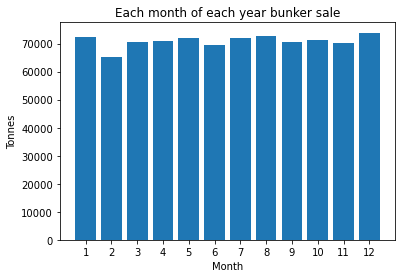

In [6]:
months = range(1,13)

plt.bar(months, results['bunker_sales'])
plt.title('Each month of each year bunker sale')
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Tonnes')
plt.show()

#From 1995 to 2020, usaully Dec has the most sales; 73885.064000 SGD

### Which year has the best sales?

In [10]:
#creating years column
df['year'] =  df["date"].str[0:4]

#converting values in month from str to int
df['year'] = df['year'].astype('int')

df.head()

,date,bunker_type,bunker_sales,month,year
0,1995-01,Marine Gas Oil,135.4,1,1995
1,1995-01,Marine Diesel Oil,67.9,1,1995
2,1995-01,Marine Fuel Oil 180 cst,412.9,1,1995
3,1995-01,Marine Fuel Oil 380 cst,820.3,1,1995
4,1995-01,Marine Fuel Oil 500 cst +,0.0,1,1995


In [11]:
results_2 = df.groupby('year').sum()
results_2[['bunker_sales']]


,bunker_sales
year,
1995,17489.200000
1996,16938.470000
1997,16940.754000
1998,18063.825000
1999,18891.202000
2000,18650.797000
2001,20351.665000
2002,20096.383000
2003,20808.967000


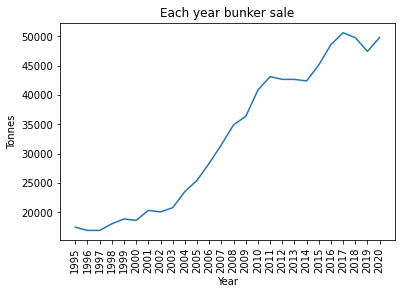

In [15]:
years = range(1995,2021)

plt.plot(years, results_2['bunker_sales'])
plt.title('Each year bunker sale')
plt.xticks(years, rotation = "vertical", size = 10)
plt.xlabel('Year')
plt.ylabel('Tonnes')
plt.show()
#2017 has the most bunker sales; 50634.627000 tonnes sold

### Which bunker type has the most sales?

In [13]:
results_3 = df.groupby('bunker_type').sum()
results_3[['bunker_sales']]
#Marine Fuel Oil 380 cst has the most sales; 590194.972079

,bunker_sales
bunker_type,
Low-Sulfur Fuel Oil 100 cst,7641.827011
Low-Sulfur Fuel Oil 180 cst,2644.137811
Low-Sulfur Fuel Oil 380 cst,30829.699165
Low-Sulfur Fuel Oil 500 cst,45.000000
Low-Sulfur Marine Gas Oil,12378.170124
Marine Diesel Oil,3807.952000
Marine Fuel Oil 180 cst,58161.617000
Marine Fuel Oil 380 cst,590194.972079
Marine Fuel Oil 500 cst +,97704.683613


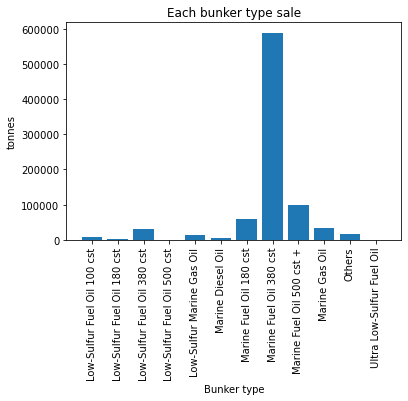

In [22]:
bunker_type = [bunker_type for bunker_type, df in df.groupby('bunker_type')]

plt.bar(bunker_type, results_3['bunker_sales'])

plt.title('Each bunker type sale')
plt.xticks(bunker_type, rotation = "vertical", size = 10)
plt.xlabel('Bunker type')
plt.ylabel('tonnes')

plt.show()

### Since Marine Fuel Oil 380 cst has the most sales, how has the demand of it grown from 1995 to 2020?

In [58]:
#updated dataframe showing only Marine Fuel Oil 380 cst data
df2 = df.loc[df['bunker_type'] == 'Marine Fuel Oil 380 cst']
df2

,date,bunker_type,bunker_sales,month,year
3,1995-01,Marine Fuel Oil 380 cst,820.300000,1,1995
15,1995-02,Marine Fuel Oil 380 cst,709.200000,2,1995
27,1995-03,Marine Fuel Oil 380 cst,807.400000,3,1995
39,1995-04,Marine Fuel Oil 380 cst,856.600000,4,1995
51,1995-05,Marine Fuel Oil 380 cst,790.400000,5,1995
...,...,...,...,...,...
3687,2020-08,Marine Fuel Oil 380 cst,971.697000,8,2020
3699,2020-09,Marine Fuel Oil 380 cst,875.966079,9,2020
3711,2020-10,Marine Fuel Oil 380 cst,1005.834000,10,2020
3723,2020-11,Marine Fuel Oil 380 cst,995.141000,11,2020


In [24]:
#Marine Fuel Oil 380 sales for each year
results_4 = df2.groupby('year').sum()
results_4[['bunker_sales']]

,bunker_sales
year,
1995,9396.700000
1996,9795.725000
1997,10303.190000
1998,11820.955000
1999,12751.539000
2000,13240.507000
2001,14668.655000
2002,14474.224000
2003,15071.878000


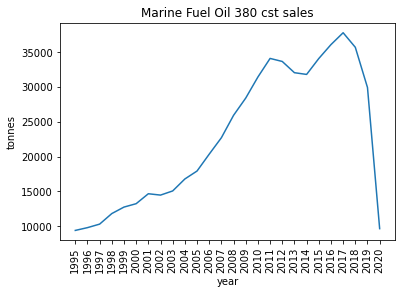

In [25]:
year = [year for year, df in df2.groupby('year')]

plt.plot(year, results_4['bunker_sales'])

plt.title('Marine Fuel Oil 380 cst sales')
plt.xticks(year, rotation = "vertical", size = 10)
plt.xlabel('year')
plt.ylabel('tonnes')

plt.show()

### There is a drop between 2017 and 2018, let's take a closer look

In [72]:
#Showing Marine Fuel Oil 380 cst bunker sales for 2017
results_5 = df2.loc[df2['year'] == 2017]
results_5

,date,bunker_type,bunker_sales,month,year
3171,2017-01,Marine Fuel Oil 380 cst,3339.082,1,2017
3183,2017-02,Marine Fuel Oil 380 cst,2918.374,2,2017
3195,2017-03,Marine Fuel Oil 380 cst,3269.868,3,2017
3207,2017-04,Marine Fuel Oil 380 cst,3185.121,4,2017
3219,2017-05,Marine Fuel Oil 380 cst,3123.028,5,2017
3231,2017-06,Marine Fuel Oil 380 cst,2784.499,6,2017
3243,2017-07,Marine Fuel Oil 380 cst,3306.317,7,2017
3255,2017-08,Marine Fuel Oil 380 cst,3234.366,8,2017
3267,2017-09,Marine Fuel Oil 380 cst,3216.083,9,2017
3279,2017-10,Marine Fuel Oil 380 cst,3067.146,10,2017


In [73]:
#Showing Marine Fuel Oil 380 cst bunker sales for 2018
results_6 = df2.loc[df2['year'] == 2018]
results_6

,date,bunker_type,bunker_sales,month,year
3315,2018-01,Marine Fuel Oil 380 cst,3369.852,1,2018
3327,2018-02,Marine Fuel Oil 380 cst,2916.037,2,2018
3339,2018-03,Marine Fuel Oil 380 cst,3103.152,3,2018
3351,2018-04,Marine Fuel Oil 380 cst,3023.125,4,2018
3363,2018-05,Marine Fuel Oil 380 cst,2947.962,5,2018
3375,2018-06,Marine Fuel Oil 380 cst,2795.739,6,2018
3387,2018-07,Marine Fuel Oil 380 cst,2917.950,7,2018
3399,2018-08,Marine Fuel Oil 380 cst,2816.547,8,2018
3411,2018-09,Marine Fuel Oil 380 cst,2981.374,9,2018
3423,2018-10,Marine Fuel Oil 380 cst,2992.426,10,2018


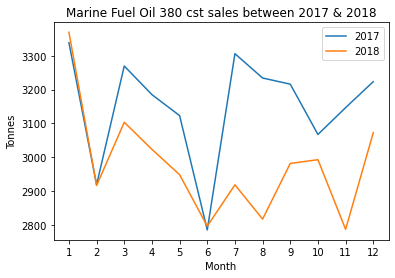

In [76]:
month = [month for month, df in df2.groupby('month')]

plt.plot(month, results_5['bunker_sales'])
plt.plot(month, results_6['bunker_sales'])

plt.title('Marine Fuel Oil 380 cst sales between 2017 & 2018')
plt.xticks(month, size = 10)
plt.xlabel('Month')
plt.ylabel('Tonnes')

plt.legend(['2017','2018'])

plt.show()